In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn import linear_model
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV

# DataFrame № 1 💎

Будем решать задачу предсказания цены бриллианта в зависимости от его характеристик

https://www.kaggle.com/datasets/shivam2503/diamonds

In [ ]:
df = pd.read_csv('diamonds.csv')

In [ ]:
pd.concat([df.head(), df.tail()])

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [ ]:
df.shape

(53940, 11)

✅ Есть ли в наборе данных пропущенные значения?

In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


✅ Есть ли в наборе данных признаки, не несущие полезной информации?

In [ ]:
df = df.drop(labels = ['Unnamed: 0'], axis = 1)

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


✅ Дополнительно происследуйте данные, которые кажутся интересными на ваш взгяд

In [ ]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

Представим, что мы не владеем информацией о том, как устроены наши данные.

✅ Исследуем вещественные признаки. Посмотрим на матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной.

- Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [ ]:
data_corr = df.drop(labels = ['cut', 'color', 'clarity'], axis = 1)

data_corr.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<Axes: >

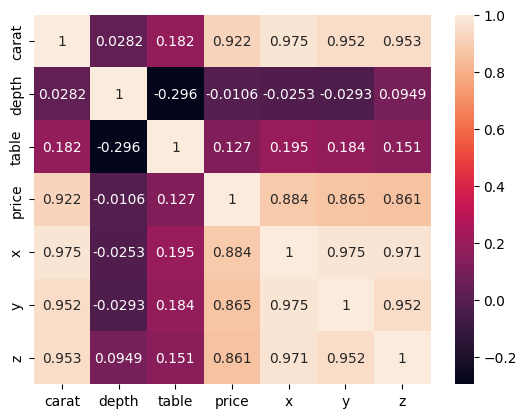

In [ ]:
import seaborn as sns

sns.heatmap(data_corr.corr(), annot = True, fmt = '.3g')

✅ Работаем с категориальными признаками. Закодируйте все категориальные признаки.

In [ ]:
ohe = OneHotEncoder(drop = 'first', sparse_output = True)

In [ ]:
X_category = df.select_dtypes([object])
ohe.fit(X_category)

OneHotEncoder(drop='first')

In [ ]:
codes = ohe.transform(X_category).toarray()
codes

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
feature_names = ohe.get_feature_names_out(['cut', 'color', 'clarity'])
feature_names

array(['cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'], dtype=object)

In [ ]:
X_ohe = pd.concat([df.select_dtypes(exclude = object), pd.DataFrame(codes, columns = feature_names).astype(int)], axis = 1)

X_ohe.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


✅ Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [ ]:
X = X_ohe.drop(['price'], axis = 1)
Y = X_ohe['price']

np.random.seed(10)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

✅ Отмасштабируйте вещественные признаки. Объясните почему это необходимо?

In [ ]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

✅ Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score

print(f'MSE на тренировочной выборке: {mean_squared_error(Y_train, lin_reg.predict(X_train))}')
print(f'MAE на тренировочной выборке: {mean_absolute_error(Y_train, lin_reg.predict(X_train))}')
print(f'R^2 на тренировочной выборке: {r2_score(Y_train, lin_reg.predict(X_train))}')

print('')

print(f'MSE на тестовой выборке: {mean_squared_error(Y_test, lin_reg.predict(X_test))}')
print(f'MAE на тестовой выборке: {mean_absolute_error(Y_test, lin_reg.predict(X_test))}')
print(f'R^2 на тестовой выборке: {r2_score(Y_test, lin_reg.predict(X_test))}')

MSE на тренировочной выборке: 1268454.955961559
MAE на тренировочной выборке: 737.8726556545131
R^2 на тренировочной выборке: 0.9192711265004452

MSE на тестовой выборке: 1303126.7488467367
MAE на тестовой выборке: 746.8517946454552
R^2 на тестовой выборке: 0.9204707243216982


✅ Выведите полученные оценки коэффициентов LinearRegression. Проанализируйте полученные коэффициенты.

In [ ]:
coefs = pd.DataFrame(lin_reg.coef_, index = X.columns, columns = ['coef'])
coefs.sort_values(by = 'coef')

,coef
x,-959.001979
color_J,-513.635437
color_I,-431.944388
color_H,-349.279490
z,-238.038613
color_G,-190.841862
color_F,-102.443444
color_E,-78.915265
depth,-73.111300
table,-67.588760


✅ Можно заметить из анализа корреляционной матрицы, что между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы мультиколлинеарности.

Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие.

- Попробуйте провести регуляризацию модели, чтобы избавиться от данной проблемы: Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10.
- Сильно ли уменьшились веса?

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

$$
\|y - X\hat{w}\|^2 + \alpha\|w\|^2
$$

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 10)
lasso.fit(X_train, Y_train)

Lasso(alpha=10)

In [ ]:
print(f'MSE в обучающей выборке: {mean_squared_error(Y_train, lasso.predict(X_train))}')
print(f'MAE в обучающей выборке: {mean_absolute_error(Y_train, lasso.predict(X_train))}')
print(f'R^2 в обучающей выборке: {r2_score(Y_train, lasso.predict(X_train))}')

MSE в обучающей выборке: 1330335.8661404855
MAE в обучающей выборке: 748.3030427989008
R^2 в обучающей выборке: 0.9153328107199805


In [ ]:
weights_lasso = pd.DataFrame(lasso.coef_, index = X.columns, columns = ['weight'])

weights_lasso.sort_values(by = 'weight')

,weight
x,-488.898100
color_J,-453.057340
color_I,-360.543701
color_H,-275.572789
z,-194.282630
color_G,-112.156115
depth,-86.418657
table,-76.384212
color_F,-36.147716
color_E,-7.884083


In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 10)
ridge.fit(X_train, Y_train)

Ridge(alpha=10)

In [ ]:
print(f'MSE в обучающей выборке: {mean_squared_error(Y_train, ridge.predict(X_train))}')
print(f'MAE в обучающей выборке: {mean_absolute_error(Y_train, ridge.predict(X_train))}')
print(f'R^2 в обучающей выборке: {r2_score(Y_train, ridge.predict(X_train))}')

MSE в обучающей выборке: 1268581.4112912423
MAE в обучающей выборке: 738.3967460111194
R^2 в обучающей выборке: 0.9192630784446073


In [ ]:
weights_ridge = pd.DataFrame(ridge.coef_, index = X.columns, columns = ['weight'])

weights_ridge.sort_values(by = 'weight')

,weight
x,-906.609607
color_J,-512.295374
color_I,-430.678540
color_H,-348.399611
z,-247.347874
color_G,-190.282234
color_F,-102.265672
color_E,-78.503666
depth,-70.737168
table,-67.727091


✅ В зависимости от значения параметра  𝛼 в Lasso-регрессии зануляются разные оценки коэффициентов. Подберите оптимальное значение коэффициента регуляризации по тренировочной выборке.

In [ ]:
from sklearn.linear_model import Lasso

A = [x / 100.0 for x in range(1, 10, 1)]
for i in A:
    lasso = Lasso(alpha = i)
    lasso.fit(X_train, Y_train)
    print(i, r2_score(Y_train, lasso.predict(X_train)))
    print(lasso.coef_)

0.01 0.9192711212839375
[5267.87127666  -73.15703136  -67.60165003 -957.76642694   79.58003298
 -237.77540127  180.04649284  421.58849797  345.28261883  319.18906746
  -78.84269114 -102.37632352 -190.76299024 -349.20628922 -431.8728447
 -513.57464135  965.30934195 1585.92171938 1031.89053718 1650.65960504
 1807.43303715 1273.96302052 1452.85490638]
0.02 0.9192711057258165
[5267.41302455  -73.20611739  -67.61449381 -956.57456608   78.50954169
 -237.48652935  179.93691007  421.40476837  345.10064791  319.04428768
  -78.77013836 -102.30915668 -190.68405019 -349.13304286 -431.80132242
 -513.51391266  964.98271767 1585.16217721 1031.22969718 1650.02049762
 1806.68860863 1273.51034121 1452.33410247]
0.03 0.9192710798426214
[5266.95516366  -73.25548207  -67.62733062 -955.38730447   77.44105291
 -237.1954534   179.82728283  421.22096841  344.91866657  318.89942327
  -78.69758877 -102.2419866  -190.60510393 -349.0597907  -431.72980025
 -513.45318825  964.6560534  1584.40258231 1030.56881592 164

✅ Обучите итоговую Lasso-регрессию с выбранным параметром  𝛼
  на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

✅ Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии

In [ ]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv = 5, n_alphas=10).fit(X_test, Y_test)

lasso.mse_path_

array([[15712511.43342902, 16653652.69668998, 15677614.77843351,
        16970245.22334142, 16589393.49517052],
       [ 5090759.3848225 ,  5586576.67097589,  5289069.94048352,
         5754242.9802916 ,  5571742.63712218],
       [ 2941872.47952464,  3170055.96874093,  3006419.91367263,
         3234476.13451195,  3163589.86694541],
       [ 2543659.08857967,  2644476.94855126,  2493980.06962211,
         2663542.79310183,  2634469.23529745],
       [ 2146130.18050412,  2167690.31259424,  2009401.63092122,
         2127545.80581863,  2166640.44153776],
       [ 1865610.25395529,  1781298.77601111,  1616636.78152025,
         1716071.57421973,  1779878.56322739],
       [ 1708574.52584523,  1644538.67394574,  1488584.78819934,
         1588044.31014343,  1659030.55283632],
       [ 1542523.66769492,  1468664.68366695,  1325020.54609303,
         1431323.22350108,  1512406.62752679],
       [ 1418179.90052256,  1330138.18905516,  1192290.18526458,
         1320014.00805175,  1417987.207